In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types

Welcome to JupyROOT 6.26/04


In [2]:
# Specify the path of the directory you want to list
directory_path = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic'
# directory_path = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic'

# Use os.listdir() to get a list of all the files and directories in the specified directory
directories = [d for d in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, d))]

print("List of directories:")
for directory in directories:
    print(directory)

FileNotFoundError: [Errno 2] No such file or directory: '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic'

In [4]:
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_cut_240229/'
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240306/'
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240310_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240310_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v0_240317_treefit/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v0_looseeta_240317_treefit_BCS/'
base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v1_240405_treefit_BCS_etapi0const/'
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_2_240828_roe_Dptag_CFT/'
# base_file_loc = '/media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240419_Kp_BCS_etapi0const/'
base_file_loc = '/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_tight_v3_241014/etapip_gg/'

In [5]:
# generic_ccbar = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00*.root'

generic_ccbar = base_file_loc + '*ccbar*.root'

# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + '*uubar*.root'
generic_ddbar = base_file_loc + '*ddbar*.root'
generic_ssbar = base_file_loc + '*ssbar*.root'
generic_charged = base_file_loc + '*charged*.root'
generic_mixed = base_file_loc + '*mixed*.root'
generic_taupair = base_file_loc + '*taupair*.root'

In [19]:
import ROOT
test_file = base_file_loc + 'ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00019_job402330242_00.root'
# Open the ROOT file containing the ntuple
file = ROOT.TFile(test_file)

# Access the ntuple
ntuple = file.Get("etapip_gg")

# Get the list of branches (variable names) in the ntuple
branches = ntuple.GetListOfBranches()

# Extract the variable names from the branches
variable_names = [branch.GetName() for branch in branches]

# Print the variable names
# print("Variable names in the ntuple:")
# # for name in variable_names:
# #     print(name)
print(variable_names)

OSError: Failed to open file /media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240827_roe_Dptag/ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00019_job402330242_00.root

Error in <TFile::TFile>: file /media/jykim/T7_2/storage/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_tight_v2_240827_roe_Dptag/ccbar/tight_v2_240827_roe_Dptag_ccbar_output_00019_job402330242_00.root does not exist


In [6]:
base_filter=' Dp_M>0'
# base_filter='etapip_gg_rank==1'
# base_filter+= '  && bdt>0.4'

# base_filter += ' && ((etapip_gamma1_clusterReg==1 && etapip_gamma1_E>0.05) || (etapip_gamma1_clusterReg==3 && etapip_gamma1_E>0.075) || (etapip_gamma1_clusterReg==2 && etapip_gamma1_E>0.05))'
# base_filter += ' && ((etapip_gamma2_clusterReg==1 && etapip_gamma2_E>0.05) || (etapip_gamma2_clusterReg==3 && etapip_gamma2_E>0.075) || (etapip_gamma2_clusterReg==2 && etapip_gamma2_E>0.05))'
# base_filter += ' && Pip_pionID > 0.6'
# base_filter += ' && etapip_Eta_p > 0.8'
# base_filter += ' && etapip_Eta_M > 0.52'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'
# base_filter += ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'
# base_filter += ' && dM_pi0_75MeV>0.011 && dM_pi0_75MeV_2>0.011 && Dp_CMS_p>3'

# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'
# base_filter += ' && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<1.04719'



# base_filter += " && Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1 && \
#                 etapip_Eta_M>0.535 && \
#                 abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5 && eta_Pi0_daughterAngle_0_1<1.4 && eta_Pi0_M>0.12 && \
#                 etapip_Eta_p>0.8 && etapip_pi0_gamma1_p>0.075 && etapip_pi0_gamma2_p>0.075 && Dp_CMS_p>3 && \
#                 Pih_pionID>0.6 && eta_Pip_pionID>0.6 && eta_Pim_pionID>0.6"

# 0.523598
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_gamma1_p>0.1 && etapip_gamma2_p>0.1'
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '


In [10]:
tree = 'etapip_gg'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar',]
             #'bdt'

variables = ["Dp_M","__experiment__", "__run__", "__event__","__production__"]

In [11]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

In [12]:
# pd_ccbar_1 = pd_ccbar_0.query("etapip_Eta_isSignal==1")

In [13]:
# plt.hist(pd_ccbar_0.Dp_M,bins=np.linspace(1.6,2.1,51), histtype='step')
# plt.xlim(1.6,2.1)

In [14]:
# plt.hist(pd_ccbar_0.Dp_M,bins=np.linspace(1.6,2.1,51), histtype='step')
# plt.xlim(1.6,2.1)

In [15]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [19]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__","__production__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

3406348
3406348
1.0


In [20]:
cut = 'Dp_M>0.0'

# cut = 'bdt>0.4'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [21]:
# Extract the directory from the file path
plot_directory = "/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_generic/gg"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [22]:

var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"
xrange = (1.6,2.1)
nbins=50
img_path=''
xlabel=''

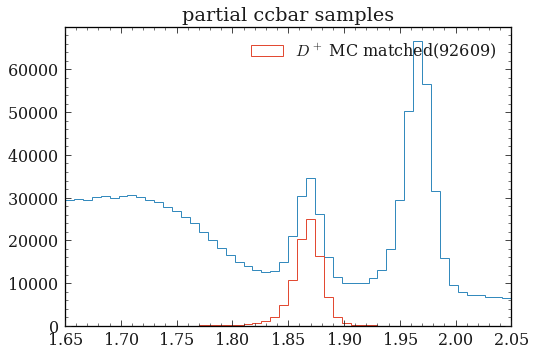

In [78]:
plt.hist(pd_ccbar['Dp_M'],bins=np.linspace(1.65,2.05,51), histtype='step');
N_Dp = len(pd_ccbar[pd_ccbar['Dp_isSignal']==1]['Dp_M'])
plt.hist(pd_ccbar[pd_ccbar['Dp_isSignal']==1]['Dp_M'],bins=np.linspace(1.65,2.05,51), histtype='step',label=f'$D^+$ MC matched({N_Dp})');

plt.title("partial ccbar samples")
plt.legend()
plt.xlim(1.65,2.05)
plt.savefig("/home/belle2/jaeyoung/ccbar_all.png")


In [79]:
pd_ccbar['num_Dstar'].unique()

array([nan,  1.,  2.,  5.,  3.,  7.,  4.,  6.,  8.,  9., 10., 11., 12.,
       14., 13., 16.])

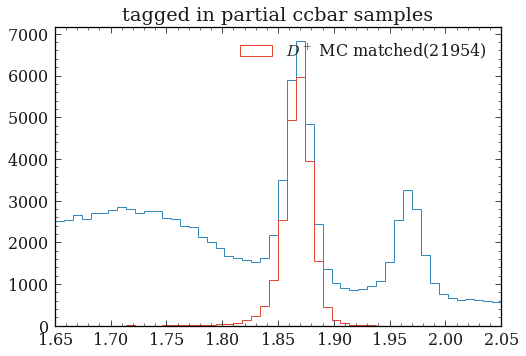

In [80]:
plt.hist(pd_ccbar[pd_ccbar['num_Dstar']>0]['Dp_M'],bins=np.linspace(1.65,2.05,51), histtype='step');
N_Dp = len(pd_ccbar[(pd_ccbar['num_Dstar']>0) & (pd_ccbar['Dp_isSignal']==1)]['Dp_M'])
plt.hist(pd_ccbar[(pd_ccbar['num_Dstar']>0) & (pd_ccbar['Dp_isSignal']==1)]['Dp_M'],bins=np.linspace(1.65,2.05,51), histtype='step',label=f'$D^+$ MC matched({N_Dp})');

plt.xlim(1.65,2.05)

plt.title("tagged in partial ccbar samples")
plt.legend()
plt.xlim(1.65,2.05)
plt.savefig("/home/belle2/jaeyoung/ccbar_tag.png")


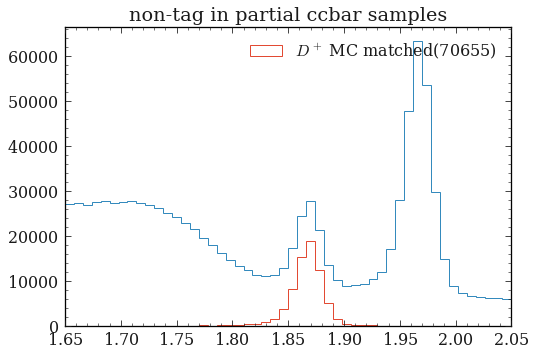

In [81]:
nan_rows = pd_ccbar[pd_ccbar['num_Dstar'].isna()];

# print(nan_rows)
plt.hist(nan_rows['Dp_M'],bins=np.linspace(1.65,2.05,51), histtype='step');
N_Dp = len(nan_rows[(nan_rows['Dp_isSignal']==1)]['Dp_M'])
plt.hist(nan_rows[(nan_rows['Dp_isSignal']==1)]['Dp_M'],bins=np.linspace(1.65,2.05,51), histtype='step',label=f'$D^+$ MC matched({N_Dp})');

# plt.xlim(1.65,2.05)
plt.title("non-tag in partial ccbar samples")
plt.legend()
plt.xlim(1.65,2.05)
plt.savefig("/home/belle2/jaeyoung/ccbar_nontag.png")


In [29]:
def wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="",force_range=tuple() ):
    data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
    labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
    MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity,force_range=force_range,save_repo=img_path)
    plt.tight_layout()

    # plt.savefig(img_path)

In [30]:
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"

scale = 427/1000
luminosity=r"$427\; \mathrm{fb}^{-1}$"


[16280.65599999 15980.90199999 15758.86199999 15792.59499999
 15901.47999999 15872.01699999 15774.23399999 15742.63599999
 15581.22999999 15465.08599999 15573.54399999 15417.68899999
 15504.36999999 15370.29199999 15068.82999999 15032.10799999
 14851.91399999 14725.94899999 14562.40799999 14514.58399999
 14182.80499999 14164.01699999 13922.33499999 13606.35499999
 13592.26399999 13425.73399999 13007.27399999 12836.90099999
 12498.71699999 12271.55299999 12143.02599999 11739.51099999
 11531.13499999 11250.169      11158.364      10666.46
 10635.289      10412.395      10311.623      10160.038
 10008.026       9750.118       9702.294       9644.222
  9715.958       9867.116       9997.778      10531.101
 11141.284      12087.51599999 13220.77399999 14137.96999999
 14046.16499999 13339.05299999 12067.01999999 10845.8
  9880.78        9146.767       8756.062       8408.057
  8390.55        8322.23        8327.781       8266.293
  8160.397       8268.855       8389.269       8478.512
  8703

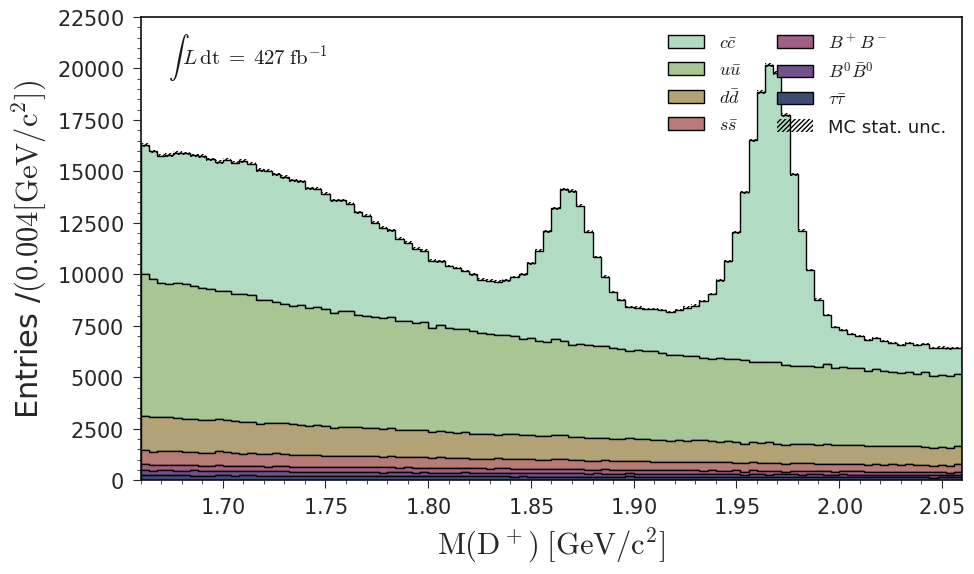

In [34]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.67,2.1)
xrange = (1.66,2.06)

nbins = 100
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step0.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv1_DpM.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_loose_v0_trainv1.png"

# img_path = plot_directory + "/test.png"
img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_v3_DpM.png"

# plt.ylim(0,150000)
wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path="")
# plt.ylim(0,90000)
plt.savefig(img_path)


In [20]:
cut = 'Dp_M>0.0'
cut += ' & abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [ ]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step1.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [ ]:
cut = 'Dp_M>0.0'
cut += ' & Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane<0.1'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [ ]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step2.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [ ]:
cut = 'Dp_M>0.0'
#cut += ' & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
cut += ' & dM_pi0_75MeV>0.011 & dM_pi0_75MeV_2>0.011'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [ ]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step3.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

In [ ]:
cut = 'Dp_M>0.0'
#cut += ' & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
cut += ' & dM_pi0_75MeV>0.011 & dM_pi0_75MeV_2>0.011'


# cut +='& abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7 & Pip_pionID > 0.6 & dM_pi0_75MeV>0.011 & Dp_cosAngleBetweenMomentumAndVertexVector>0.99'
# cut +=' & etapip_gamma1_p>0.3 & etapip_gamma2_p>0.3'
# cut = 'etapip_Eta_isSignal==1'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'v

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [ ]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM_step4.png"
# img_path = plot_directory + "/MC15ri_Dpetapip_gg_tight_selv0_DpM.png"

# img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[106258. 105129. 103722. 103459. 102817. 101991. 101639. 100103. 100007.
  98370.  97510.  96230.  93651.  91814.  88324.  85591.  81963.  78859.
  75151.  72884.  70278.  68825.  69164.  70783.  73212.  77038.  78914.
  74804.  68896.  63732.  62747.  64545.  69611.  76840.  87402.  98122.
 102739.  91922.  73522.  60147.  53605.  51712.  50787.  50284.  49624.
  49219.  48660.  48622.  48130.  47376.]
fitst_bin_entries=106258.0


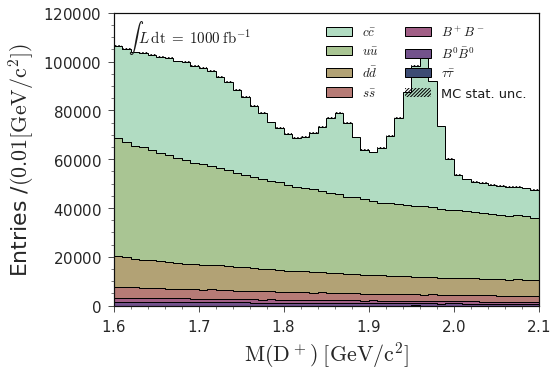

In [124]:
var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpM.png"
img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[     0.      0.      0.      0.      0.      0.      0.      0.      0.
      0. 419280. 389370. 364487. 338350. 314692. 292848. 273484. 255308.
 235419. 219509. 203844. 189617. 176353. 162807. 149727. 138675. 127356.
 117388. 108442.  98932.  90272.  82474.  74584.  67654.  60686.  54951.
  48890.  43699.  38356.  33859.  29154.  25371.  21474.  18395.  15334.
  12749.  10112.   8475.   6746.   5279.]
fitst_bin_entries=0.0


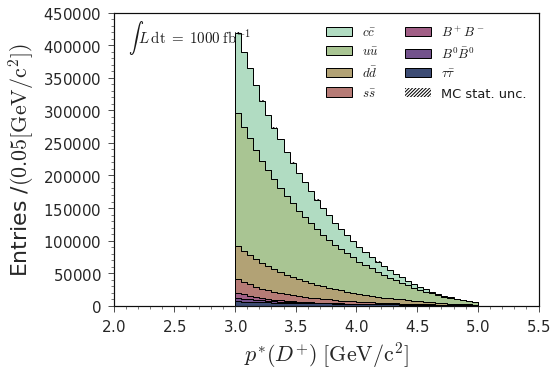

In [113]:
var = 'Dp_CMS_p'
xrange = (2.5,5)
nbins = 50
xlabel = r"$p^{*}(D^{+})$"

# img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_DpCMSp.png"
img_path = plot_directory + "/test.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[ 913486.  915401.  920561.  924043.  927923.  933250.  938529.  945941.
  953892.  960001.  967499.  975988.  986471.  996243. 1006985. 1019517.
 1030246. 1045713. 1058891. 1073577. 1083096. 1100889. 1113090. 1124111.
 1137589. 1145507. 1155322. 1162019. 1162330. 1166219. 1161494. 1156567.
 1148410. 1136912. 1123767. 1109590. 1092408. 1073265. 1056337. 1035936.
 1019613. 1002190.  986888.  972904.  958827.  945612.  937090.  927973.
  923287.  914506.]
fitst_bin_entries=913486.0


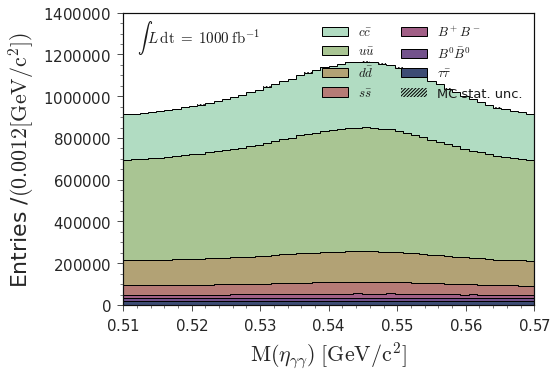

In [86]:
var = 'etapip_Eta_M'
xrange = (0.51,0.57)
nbins = 50
xlabel = "$\mathrm{M(\eta_{\gamma\gamma})}$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etaM.png"

wrap_draw(var=var,data=data,scale=scale,xrange=xrange,nbins=nbins,xlabel=xlabel, luminosity=luminosity,img_path=img_path)

[2425345. 2046122. 1770898. 1569728. 1411000. 1269118. 1150976. 1065570.
 1002716.  982729.  993797. 1062996. 1215406. 1395202. 1540899. 1652498.
 1725710. 1768818. 1793733. 1798559. 1788977. 1768365. 1737076. 1686809.
 1629775. 1561952. 1479618. 1386838. 1260369. 1108083.  953520.  813114.
  698072.  598273.  514157.  439886.  376023.  322044.  275362.  234700.
  201142.  171860.  147820.  126158.  107624.   90261.   76535.   64819.
   53889.   45251.]
fitst_bin_entries=2425345.0


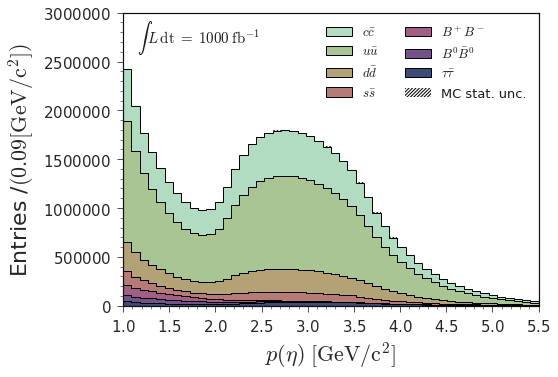

In [87]:
var = 'etapip_Eta_p'
xrange = (1,5.5)
nbins = 50
xlabel = r"$p(\eta)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_Eta_p.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[ 784953.  785295.  781139.  778520.  774836.  772367.  767699.  765395.
  766013.  768337.  781419.  801776.  827334.  868844.  923158.  997648.
 1100813. 1212248. 1298549. 1397976. 1574569. 1880842. 1806136. 1460609.
 1351511. 1349846. 1454375. 1762989. 1784957. 1509593. 1351347. 1260005.
 1178272. 1068839.  972977.  903341.  852258.  813566.  787237.  770533.
  759949.  756330.  757648.  760187.  763052.  767438.  771218.  777863.
  781607.  784492.]
fitst_bin_entries=784953.0


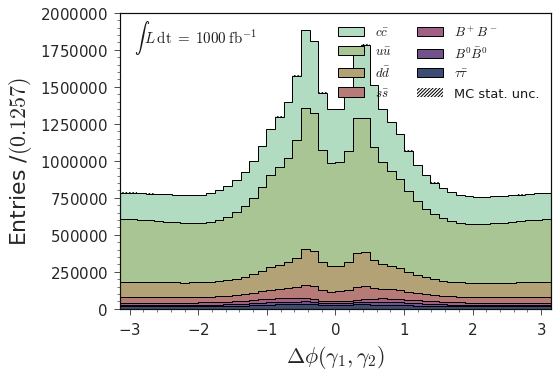

In [88]:
var = 'etapip_Eta_daughterDiffOfPhi_0_1'

xrange = (-math.pi,math.pi)
nbins = 50
xlabel = r"$\Delta \phi(\gamma_1,\gamma_2)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_Eta_daughterDiffOfPhi_0_1.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[      0.       0.    3436.  212110. 1106599. 2050229. 2171661. 1962287.
 1697861. 1600071. 1623678. 1694652. 1787913. 1870066. 1927353. 1911976.
 1740445. 1595195. 1498931. 1438850. 1396550. 1370041. 1338454. 1310825.
 1272290. 1237483. 1193147. 1146793. 1096361. 1047910. 1001917.  963250.
  930965.  900613.  864008.  820401.  769550.  716555.  664466.  613674.
  555176.  499704.  446868.  392989.  334873.  274658.  211851.  147358.
   87489.   28373.]
fitst_bin_entries=0.0


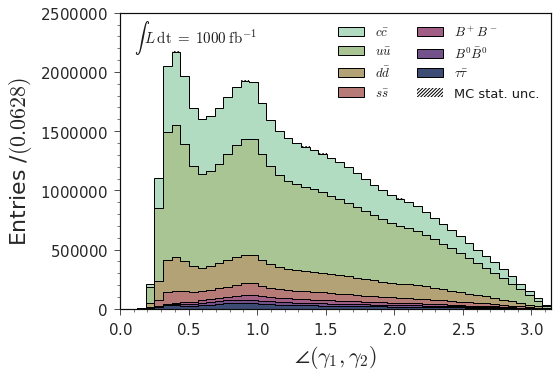

In [89]:
var = 'etapip_Eta_daughterAngle_0_1'

xrange = (0,math.pi)
nbins = 50
xlabel = r"$\angle(\gamma_1,\gamma_2)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_Eta_daughterAngle_0_1.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[0.000000e+00 0.000000e+00 0.000000e+00 9.789470e+05 8.341800e+04
 2.197991e+06 2.689860e+05 3.148462e+06 6.034350e+05 4.653320e+05
 3.493356e+06 4.057390e+05 3.113719e+06 3.071410e+05 2.508699e+06
 2.224340e+05 1.984197e+06 1.683541e+06 1.612350e+05 1.568848e+06
 1.812410e+05 1.649619e+06 2.388770e+05 1.889419e+06 3.351650e+05
 6.288120e+05 2.260535e+06 5.608340e+05 2.663344e+06 6.268760e+05
 2.982653e+06 6.265250e+05 3.143651e+06 3.231910e+06 3.938330e+05
 2.846705e+06 2.374880e+05 2.125296e+06 9.931200e+04 1.191593e+06
 2.365400e+04 6.912200e+04 3.224420e+05 4.320000e+02 3.087000e+03
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
fitst_bin_entries=0.0


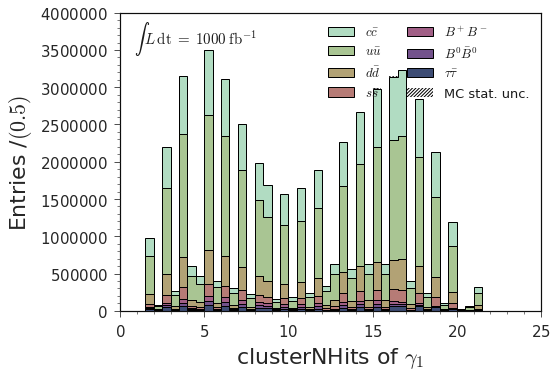

In [90]:
var = 'etapip_gamma1_clusterNHits'

xrange = (0,25)
nbins = 50
xlabel = r"clusterNHits of $\gamma_1$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma1_clusterNHits.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[      0.       0.       0. 1144385.  106296. 2329279.  303500. 3015123.
  592392.  447104. 2986650.  360287. 2481793.  263915. 1939044.  189667.
 1552296. 1375017.  139877. 1364831.  161789. 1541645.  219525. 1860304.
  314796.  598545. 2304796.  554248. 2751083.  654982. 3138676.  701532.
 3422202. 3672308.  496682. 3423440.  315734. 2627769.  136985. 1467100.
   36252.  100239.  410357.    3696.   21764.       0.       0.       0.
       0.       0.]
fitst_bin_entries=0.0


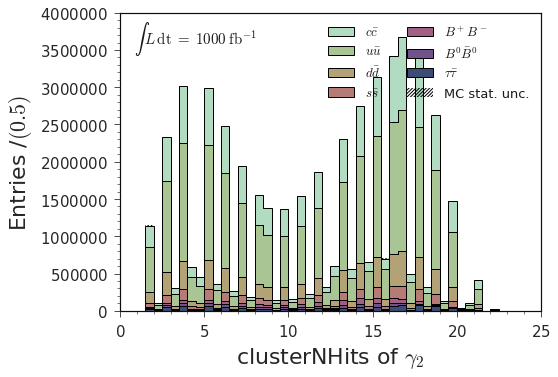

In [91]:
var = 'etapip_gamma2_clusterNHits'

xrange = (0,25)
nbins = 50
xlabel = r"clusterNHits of $\gamma_2$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma2_clusterNHits.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[10680338.  5591062.  2555059.  1506993.  1057516.   841436.   744274.
   682950.   651259.   642316.   664440.   710470.   834758.  1097173.
  1001596.   902923.   834987.   790944.   742165.   695733.   668280.
   644653.   634170.   650530.   660306.   701620.   763490.   826469.
   866351.   883568.   882597.   872353.   847786.   818350.   781876.
   737187.   687315.   637307.   584757.   531356.   475715.   427288.
   375039.   330081.   285585.   246964.   214348.   183193.   158564.
   136311.]
fitst_bin_entries=10680338.0


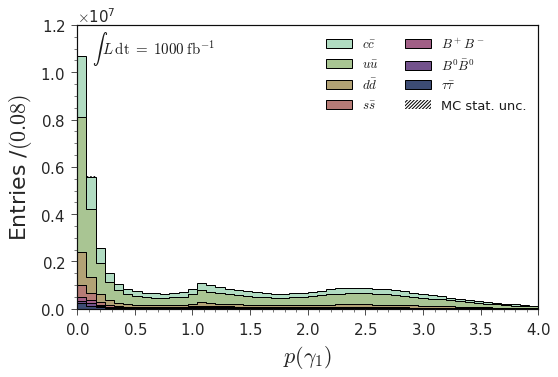

In [92]:
var = 'etapip_gamma1_p'

xrange = (0,4)
nbins = 50
xlabel = r"$p(\gamma_1)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma1_p.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[9560429. 4924635. 2193792. 1314010.  913597.  737843.  667591.  624488.
  604830.  610693.  690036.  719082.  912920. 1290571. 1208686. 1083360.
  994709.  918587.  844452.  781862.  723286.  678218.  639154.  612357.
  591732.  582786.  582333.  588338.  600313.  616769.  630483.  645149.
  658267.  672759.  684208.  697649.  707763.  709378.  708729.  698762.
  681767.  658255.  630096.  593238.  540103.  482689.  422533.  369202.
  320025.  279960.]
fitst_bin_entries=9560429.0


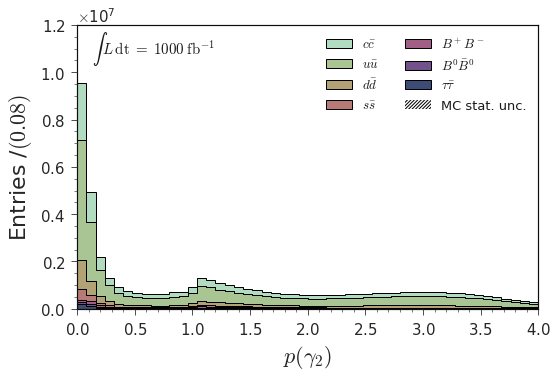

In [93]:
var = 'etapip_gamma2_p'

xrange = (0,4)
nbins = 50
xlabel = r"$p(\gamma_2)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma2_p.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[      0. 3832383. 4186054. 2661901. 1525423. 1774676. 1278053. 1012910.
  811361.  660884.  581836.  500978.  433251.  385802.  356159.  331781.
  297871.  271040.  251662.  236943.  224772.  212742.  204226.  199696.
  194970.  187599.  182503.  179202.  174782.  171616.  168860.  167692.
  164771.  162855.  161836.  161797.  161451.  160823.  159614.  160428.
  164732.  167361.  165156.  167191.  172530.  176780.  178157.  183003.
  190023.  199071.]
fitst_bin_entries=0.0


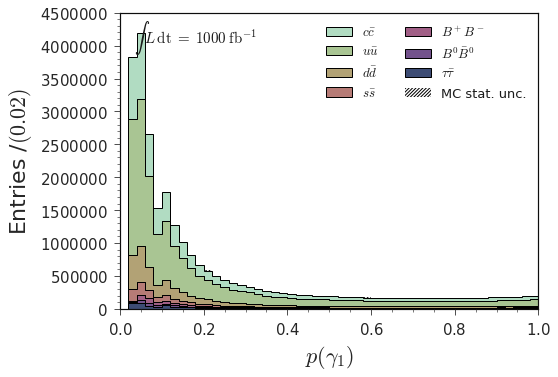

In [94]:
var = 'etapip_gamma1_p'

xrange = (0,1)
nbins = 50
xlabel = r"$p(\gamma_1)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma1_p_zoom.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[      0. 3895513. 3327490. 2337426. 1347178. 1594393. 1123136.  859928.
  685111.  562343.  504360.  441978.  376914.  335760.  307955.  293381.
  257616.  233475.  217452.  205054.  194248.  186497.  179961.  177137.
  174007.  168402.  164779.  160403.  158199.  156378.  155180.  154731.
  152717.  151150.  151023.  149940.  150896.  151728.  152836.  155233.
  174573.  184943.  165840.  164680.  169915.  176359.  182708.  190100.
  201474.  216114.]
fitst_bin_entries=0.0


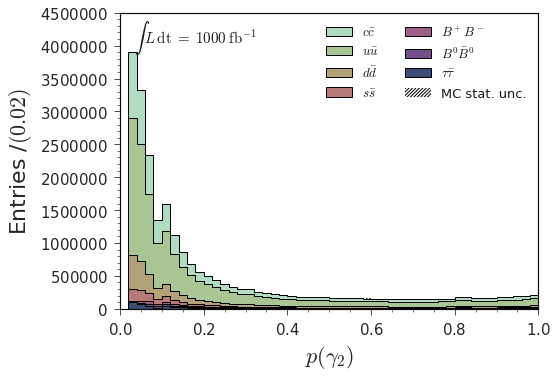

In [95]:
var = 'etapip_gamma2_p'

xrange = (0,1)
nbins = 50
xlabel = r"$p(\gamma_2)$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_etapip_gamma2_p_zoom.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[       0.        0.        0.        0.        0.   432282.   420392.
   416674.   434864.   439749.   463238.   486922.   523111.   558660.
   602502.   654250.   736970.   797867.   848564.   949779.   906099.
   927229.   969302.   926864.   898930.   816331.   775043.   743679.
   719782.   698573.   679858.   647321.   599224.   555392.   526227.
   504186.   488861.   481860.   476812.   477279.   483283.   495199.
   510490.   546983.   604101.   694829.   851785.  1140677.  3959250.
 19656632.]
fitst_bin_entries=0.0


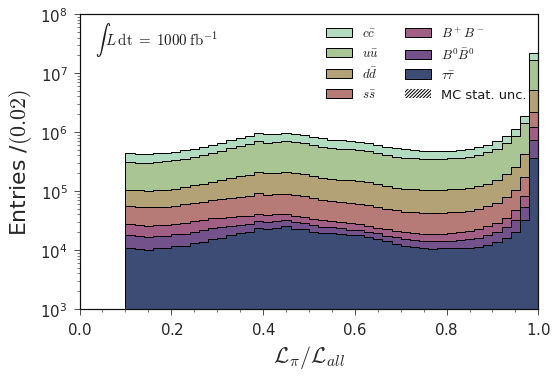

In [96]:
var = 'Pip_pionID'

xrange = (0,1)
nbins = 50
xlabel = r"$\mathcal{L}_{\pi}/\mathcal{L}_{all}$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_Pip_pionID.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.yscale('log')
plt.tight_layout()

plt.savefig(img_path)

[4.4031686e+07 2.2530390e+06 8.0743800e+05 4.9058000e+05 3.6269100e+05
 2.9006600e+05 2.4104200e+05 2.0535600e+05 1.7975000e+05 1.5877100e+05
 1.4319300e+05 1.2988900e+05 1.1921700e+05 1.1053300e+05 1.0241100e+05
 9.7037000e+04 9.0576000e+04 8.5725000e+04 8.2016000e+04 7.8308000e+04
 7.4353000e+04 7.1635000e+04 6.8497000e+04 6.5318000e+04 6.3000000e+04
 6.0926000e+04 5.9281000e+04 5.7630000e+04 5.5824000e+04 5.3692000e+04
 5.1871000e+04 5.0365000e+04 4.9499000e+04 4.7462000e+04 4.6484000e+04
 4.5268000e+04 4.4169000e+04 4.2762000e+04 4.2338000e+04 4.0761000e+04
 4.0160000e+04 3.9369000e+04 3.8974000e+04 3.8570000e+04 3.7890000e+04
 3.7785000e+04 3.6549000e+04 3.6576000e+04 3.6061000e+04 3.5512000e+04]
fitst_bin_entries=44031686.0


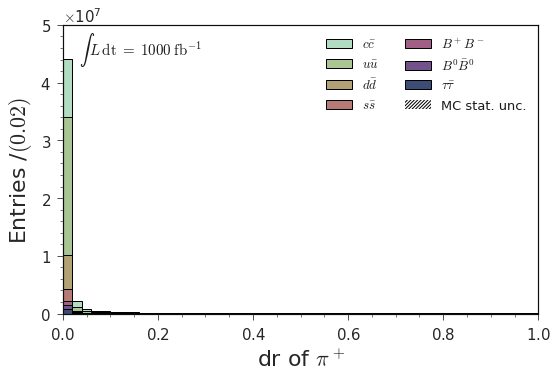

In [97]:
var = 'Pip_dr'

xrange = (0,1)
nbins = 50
xlabel = r"dr of $\pi^+$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_Pip_dr.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

In [98]:
var = 'Pip_dz'

xrange = (-3,3)
nbins = 50
xlabel = r"dz of $\pi^+$"

img_path = plot_directory + "/MC15ri_Dpetapip_gg_pre_sel_Pip_dz.png"

data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  
MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity, force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

KeyError: 'Pip_dz'